In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [259]:
data = pd.read_csv("Traffic.csv")
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


# **Preparing dataset **

In [260]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data

,time,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [261]:
data.isnull().sum()

time                 0
date                 0
day_of_the_week      0
carcount             0
bikecount            0
buscount             0
truckcount           0
total                0
traffic_situation    0
dtype: int64

# Feature Engineering for Logistic Regression optimization

In [262]:
# Convert the 'Time' column to a datetime object
data['time_new'] = pd.to_datetime(data['time'], format='%I:%M:%S %p')

# Extract hour, minute, and second
data['hour'] = data['time_new'].dt.hour
data['minute'] = data['time_new'].dt.minute
data['second'] = data['time_new'].dt.second

#Add new column Weekday/Weekend
data['weekend'] = data['day_of_the_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

data['is_morning'] = data['hour'].apply(lambda x: 1 if x in range(6,12) else 0)
data['is_night'] = data['hour'].apply(lambda x: 1 if x in range(0,6) else 0)
data['is_day'] = data['hour'].apply(lambda x: 1 if x in range(12,18) else 0)
data['is_evening'] = data['hour'].apply(lambda x: 1 if x in range(18,24) else 0)

# Print the DataFrame with the new columns
data

,time,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation,time_new,hour,minute,second,weekend,is_morning,is_night,is_day,is_evening
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,1900-01-01 00:00:00,0,0,0,0,0,1,0,0
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,1900-01-01 00:15:00,0,15,0,0,0,1,0,0
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,1900-01-01 00:30:00,0,30,0,0,0,1,0,0
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,1900-01-01 00:45:00,0,45,0,0,0,1,0,0
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1900-01-01 01:00:00,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal,1900-01-01 22:45:00,22,45,0,0,0,0,0,1
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal,1900-01-01 23:00:00,23,0,0,0,0,0,0,1
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal,1900-01-01 23:15:00,23,15,0,0,0,0,0,1
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal,1900-01-01 23:30:00,23,30,0,0,0,0,0,1


In [263]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7,
}

#data['day_of_the_week'] = data['day_of_the_week'].replace(day_mapping)

In [264]:
traffic_situation_mapping = {'low': 0, 'normal': 1, 'high': 2, 'heavy':3}
data['traffic_situation'].replace(traffic_situation_mapping, inplace=True)

In [265]:
#Checking values in all columns
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())
    print()

time
['12:00:00 AM' '12:15:00 AM' '12:30:00 AM' '12:45:00 AM' '1:00:00 AM']
96

date
[10 11 12 13 14]
31

day_of_the_week
['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
7

carcount
[31 49 46 51 57]
172

bikecount
[ 0  6  4 22 16]
71

buscount
[ 4  3  2 15  5]
51

truckcount
[ 4  3  6  5 16]
41

total
[39 55 58 94 53]
239

traffic_situation
[0 1 3 2]
4

time_new
<DatetimeArray>
['1900-01-01 00:00:00', '1900-01-01 00:15:00', '1900-01-01 00:30:00',
 '1900-01-01 00:45:00', '1900-01-01 01:00:00']
Length: 5, dtype: datetime64[ns]
96

hour
[0 1 2 3 4]
24

minute
[ 0 15 30 45]
4

second
[0]
1

weekend
[0 1]
2

is_morning
[0 1]
2

is_night
[1 0]
2

is_day
[0 1]
2

is_evening
[0 1]
2



In [266]:
data.dtypes

time                         object
date                          int64
day_of_the_week              object
carcount                      int64
bikecount                     int64
buscount                      int64
truckcount                    int64
total                         int64
traffic_situation             int64
time_new             datetime64[ns]
hour                          int32
minute                        int32
second                        int32
weekend                       int64
is_morning                    int64
is_night                      int64
is_day                        int64
is_evening                    int64
dtype: object

In [267]:
#selecting columns for the dataset
dataset = data[['date', 'day_of_the_week', 'carcount', 'bikecount', 'buscount', 'truckcount', 'total', 'traffic_situation', 'hour',	'minute']]
dataset

,date,day_of_the_week,carcount,bikecount,buscount,truckcount,total,traffic_situation,hour,minute
0,10,Tuesday,31,0,4,4,39,0,0,0
1,10,Tuesday,49,0,3,3,55,0,0,15
2,10,Tuesday,46,0,3,6,55,0,0,30
3,10,Tuesday,51,0,2,5,58,0,0,45
4,10,Tuesday,57,6,15,16,94,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2971,9,Thursday,16,3,1,36,56,1,22,45
2972,9,Thursday,11,0,1,30,42,1,23,0
2973,9,Thursday,15,4,1,25,45,1,23,15
2974,9,Thursday,16,5,0,27,48,1,23,30


# Checking Feature Correlation

In [271]:
data_numeric = data.copy()
data_numeric = data.drop(['second', 'time_new', 'time', 'carcount', 'bikecount', 'buscount', 'truckcount', 'total'], axis=1)
#data_numeric1 = data_numeric.copy()
data_numeric1 = data_numeric.drop(['day_of_the_week' ], axis=1)
data_numeric.describe()

,date,traffic_situation,hour,minute,weekend,is_morning,is_night,is_day,is_evening
count,2976.000000,2976.000000,2976.00000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,1.464046,11.50000,22.500000,0.258065,0.250000,0.250000,0.250000,0.250000
std,8.945775,0.954803,6.92335,16.773328,0.437643,0.433085,0.433085,0.433085,0.433085
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,5.75000,11.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,11.50000,22.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,2.000000,17.25000,33.750000,1.000000,0.250000,0.250000,0.250000,0.250000
max,31.000000,3.000000,23.00000,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [273]:
data_numeric1.corr()

,date,traffic_situation,hour,minute,weekend,is_morning,is_night,is_day,is_evening
date,1.000000e+00,-0.007438,2.814316e-16,2.865092e-17,8.242256e-02,-4.205478e-17,-2.857914e-16,-4.513713e-17,-1.249892e-16
traffic_situation,-7.437779e-03,1.000000,1.001473e-01,-2.597320e-02,2.542984e-02,3.038135e-01,-3.773790e-01,1.810688e-01,-1.075032e-01
hour,2.814316e-16,0.100147,1.000000e+00,-1.003662e-17,-2.651986e-16,-2.502173e-01,-7.506519e-01,2.502173e-01,7.506519e-01
minute,2.865092e-17,-0.025973,-1.003662e-17,1.000000e+00,-5.978485e-18,-3.863209e-18,1.035669e-17,-8.959358e-18,-6.575675e-19
weekend,8.242256e-02,0.025430,-2.651986e-16,-5.978485e-18,1.000000e+00,-9.795408e-18,-3.182277e-17,9.258876e-17,-7.875705e-19
is_morning,-4.205478e-17,0.303813,-2.502173e-01,-3.863209e-18,-9.795408e-18,1.000000e+00,-3.333333e-01,-3.333333e-01,-3.333333e-01
is_night,-2.857914e-16,-0.377379,-7.506519e-01,1.035669e-17,-3.182277e-17,-3.333333e-01,1.000000e+00,-3.333333e-01,-3.333333e-01
is_day,-4.513713e-17,0.181069,2.502173e-01,-8.959358e-18,9.258876e-17,-3.333333e-01,-3.333333e-01,1.000000e+00,-3.333333e-01
is_evening,-1.249892e-16,-0.107503,7.506519e-01,-6.575675e-19,-7.875705e-19,-3.333333e-01,-3.333333e-01,-3.333333e-01,1.000000e+00


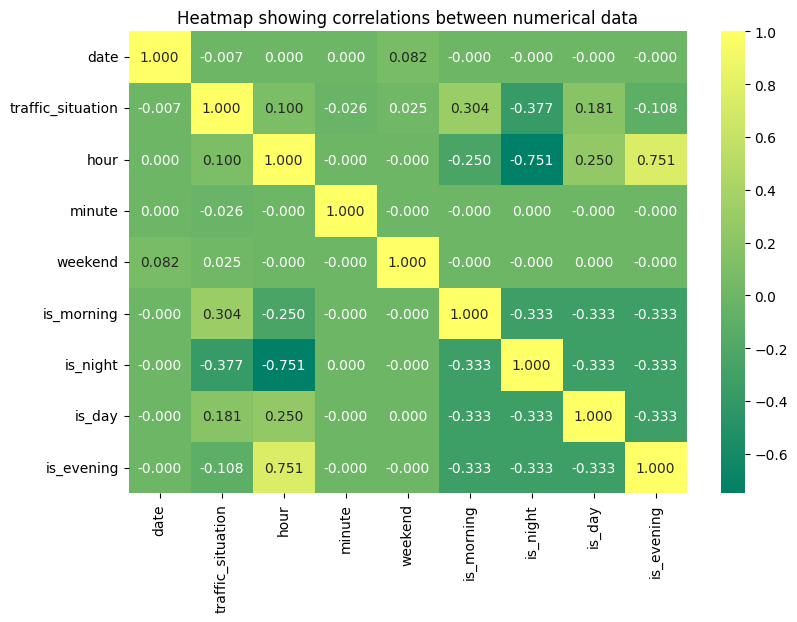

In [274]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric1.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [276]:
data_numeric1.corr().unstack().sort_values(ascending = False)

date               date                 1.000000
traffic_situation  traffic_situation    1.000000
is_day             is_day               1.000000
is_night           is_night             1.000000
is_morning         is_morning           1.000000
                                          ...   
is_evening         is_night            -0.333333
traffic_situation  is_night            -0.377379
is_night           traffic_situation   -0.377379
                   hour                -0.750652
hour               is_night            -0.750652
Length: 81, dtype: float64

## Split the data

In [277]:
len(dataset)

2976

In [278]:
df_full_train, df_test = train_test_split(data_numeric, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [279]:
len(df_train), len(df_val), len(df_test)

(1785, 595, 596)

In [280]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [281]:
y_train = df_train.traffic_situation.values
y_val = df_val.traffic_situation.values
y_test = df_test.traffic_situation.values

In [282]:
del df_train['traffic_situation']
del df_val['traffic_situation']
del df_test['traffic_situation']

In [283]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

# Training the model

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
import xgboost as xgb

# Using Linear regression Model with default paramters for predicting

In [285]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [286]:
y_pred = model.predict(X_val)

In [287]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.6134453781512605

In [288]:
features = ['date', 'day_of_the_week', 'weekend', 'hour',	'minute']

# Finding the best value for Regularization

In [289]:
scores = []

for C in [0.001, 0.1, 0.5, 1.0, 5, 10, 15, 100, 1000]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    #model = RidgeClassifier(solver='sag', alpha = C, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    scores.append((C, accuracy))
    print('C=%2f, Accuracy=%.3f' % (C, accuracy))

C=0.001000, Accuracy=0.563
C=0.100000, Accuracy=0.620
C=0.500000, Accuracy=0.613
C=1.000000, Accuracy=0.613
C=5.000000, Accuracy=0.608
C=10.000000, Accuracy=0.607
C=15.000000, Accuracy=0.608
C=100.000000, Accuracy=0.610
C=1000.000000, Accuracy=0.610


Using Random Forest for training the model

In [290]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7361344537815127

# Finding the optimal number of estimators 

In [291]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    scores.append(( n, accuracy))

In [292]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'accuracy'])

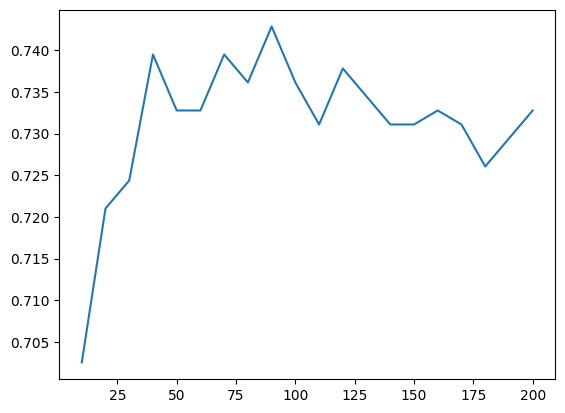

In [293]:
plt.plot(df_scores.n_estimators, df_scores.accuracy)

In [294]:
scores = []
for d in  [None, 5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        scores.append((d, n, accuracy))

In [295]:
df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators', 'accuracy'])

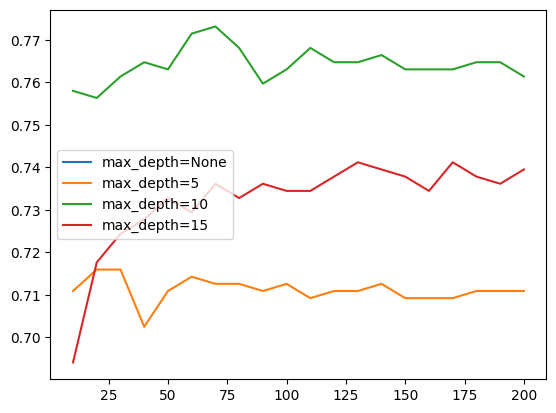

In [296]:
for d in [None, 5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.accuracy,
             label='max_depth=%s' % d)

plt.legend()

In [297]:
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['accuracy'])
df_scores_pivot.round(3)

accuracy                     
max_depth         NaN   5.0    10.0   15.0
n_estimators                              
10              0.703  0.711  0.758  0.694
20              0.721  0.716  0.756  0.718
30              0.724  0.716  0.761  0.724
40              0.739  0.703  0.765  0.728
50              0.733  0.711  0.763  0.733
60              0.733  0.714  0.771  0.729
70              0.739  0.713  0.773  0.736
80              0.736  0.713  0.768  0.733
90              0.743  0.711  0.760  0.736
100             0.736  0.713  0.763  0.734
110             0.731  0.709  0.768  0.734
120             0.738  0.711  0.765  0.738
130             0.734  0.711  0.765  0.741
140             0.731  0.713  0.766  0.739
150             0.731  0.709  0.763  0.738
160             0.733  0.709  0.763  0.734
170             0.731  0.709  0.763  0.741
180             0.726  0.711  0.765  0.738
190             0.729  0.711  0.765  0.736
200             0.733  0.711  0.761  0.739

# Decision Tree

In [298]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, accuracy))

   1 -> 0.563
   2 -> 0.632
   3 -> 0.629
   4 -> 0.639
   5 -> 0.733
   6 -> 0.750
  10 -> 0.726
  15 -> 0.649
  20 -> 0.637
None -> 0.639


In [299]:
scores = []

for depth in [4, 5, 6, 10]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)

        scores.append((depth, s, accuracy))

In [300]:
columns = ['max_depth', 'min_samples_leaf', 'accuracy']
df_scores = pd.DataFrame(scores, columns=columns)

In [301]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['accuracy'])
df_scores_pivot.round(3)

accuracy                     
max_depth              4      5      6      10
min_samples_leaf                              
1                   0.639  0.733  0.750  0.721
5                   0.639  0.729  0.750  0.750
10                  0.632  0.723  0.739  0.751
15                  0.644  0.739  0.750  0.768
20                  0.644  0.739  0.750  0.745
100                 0.637  0.692  0.682  0.682
200                 0.692  0.692  0.692  0.692
500                 0.563  0.563  0.563  0.563

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

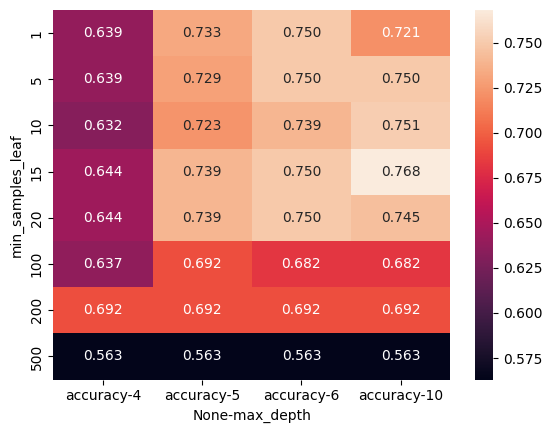

In [302]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")